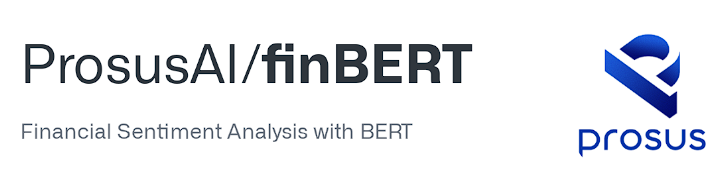

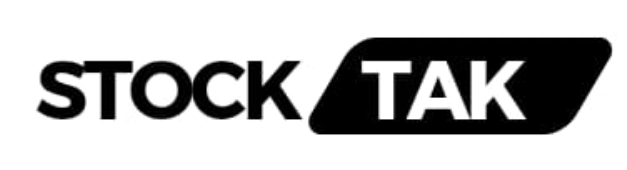

# USING RANDOM FOREST MODEL

# Git cloning the gist which contains 3000 stock market news headlines

In [ ]:
!git clone https://gist.github.com/YashBhausahebDhole/a8f61599e925f34059142ecb3b92c36f

fatal: destination path 'a8f61599e925f34059142ecb3b92c36f' already exists and is not an empty directory.


In [ ]:
import pandas

headlines_df = pandas.read_csv('a8f61599e925f34059142ecb3b92c36f/3000_stock_headlines.csv')
headlines_df.head(15)

,Unnamed: 0.1,Unnamed: 0,headline,url,publisher,date,stock
0,1304084,1307105,Notable earnings after Thursday's close,http://seekingalpha.com/news/3225116-notable-e...,Seeking Alpha,2016-11-16 00:00:00,POST
1,871819,873877,"Intersil Beats 1Q Earnings, Revs Lag - Analyst...",http://www.zacks.com/stock/news/98175/intersil...,Zacks,2013-04-29 00:00:00,ISIL
2,171302,171756,Brunswick (BC) Plans To Spin-Off Fitness Busin...,https://seekingalpha.com/article/4153223-bruns...,Seeking Alpha,2018-03-05 00:00:00,BC
3,1645188,1649033,Consolidated Communications (CNSL) Q2 Earnings...,http://www.zacks.com/stock/news/453543/consoli...,Zacks,2019-07-30 00:00:00,TU
4,1161702,1164433,"Day Two Keynote Speaker, Charlie Riedl with CL...",http://www.gurufocus.com/news/1027489/day-two-...,GuruFocus,2020-02-03 00:00:00,NOG
5,542223,543540,EQT Rubbishes JANA Claims on Rice Energy Buyou...,http://www.zacks.com/stock/news/279038/eqt-rub...,Zacks,2017-10-17 00:00:00,EQT
6,1810425,1814710,Retailers look for government help for shippin...,http://seekingalpha.com/news/3206838-retailers...,Seeking Alpha,2016-09-02 00:00:00,XLY
7,1519282,1522858,Sempra Energy Donates To Fisher House Foundati...,https://www.benzinga.com/node/14776768,GuruFocus,2019-11-11 00:00:00,SRE
8,1017663,1020045,"Still Bullish on BioMarin, Lexicon Pharma",https://www.benzinga.com/content/thestreet-com...,webmaster,2012-11-07 00:00:00,LXRX
9,4069,4132,MoneyGram Shares Jump 50% As Western Union Rep...,https://talkmarkets.com/content/moneygram-shar...,TalkMarkets,2020-06-02 00:00:00,AAPL


In [ ]:
import numpy as np

headlines_array = np.array(headlines_df)
headlines_list = list(headlines_array[:,2])
stocks_list = list(headlines_array[:, -1])

print(headlines_list)
print(stocks_list)

["Notable earnings after Thursday's close", 'Intersil Beats 1Q Earnings, Revs Lag - Analyst Blog', 'Brunswick (BC) Plans To Spin-Off Fitness Business - Slideshow', "Consolidated Communications (CNSL) Q2 Earnings: What's Up?", 'Day Two Keynote Speaker, Charlie Riedl with CLNG, Announced for EnerCom Dallas Energy ...', 'EQT Rubbishes JANA Claims on Rice Energy Buyout Synergies', 'Retailers look for government help for shipping crisis', 'Sempra Energy Donates To Fisher House Foundation As Part Of Commitment To Veteran Causes', 'Still Bullish on BioMarin, Lexicon Pharma', 'MoneyGram Shares Jump 50% As Western Union Reportedly Looks For Acquisition', "Domino's And Papa John's Face Major Threat As Pizza Industry Is Set To Change", 'GameStop near Support', 'Apple: A Top Fidelity Manager Sticks By The Stock', 'Ex-Dividend Stocks: Intel, Citigroup', 'Border tax seen as a profit headwind for major retailers', 'REITs: Something to Build On - Zacks Analyst Interviews', "What's Next For Oil?", 'Par

# Getting the tokenizer and the model

In [ ]:
!pip install transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


# Installing Weights & Biases Python client and initializing a W&B Table

In [ ]:
!pip install wandb
import wandb

wandb.init(project="FinBERT_Stock_Sentiment_Analysis")

headlines_table = wandb.Table(columns=["Headline", "Stock", "Positive", "Negative", "Neutral"])

## Performing inference on the stock market news headlines with the FinBERT model implemented in HuggingFace

In [ ]:
import torch

def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

STRIDE = 100

model.eval()

n = 0
for lines, stocks in zip(chunk_list(headlines_list, STRIDE), chunk_list(stocks_list, STRIDE)):
    # Convert all elements in lines to strings and then concatenate
    lines = " ".join(map(str, lines))

    inputs = tokenizer(lines, padding=True, truncation=True, return_tensors='pt', max_length=512, return_attention_mask=True)
    outputs = model(**inputs)

    prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)

    print(f"{n+1}/{int(len(headlines_list)/STRIDE)}")

    for headline, stock, pos, neg, neutr in zip(lines, stocks, prediction[:, 0].tolist(), prediction[:, 1].tolist(), prediction[:, 2].tolist()):
        headlines_table.add_data(headline, stock, pos, neg, neutr)

    n += 1


1/26
2/26
3/26
4/26
5/26
6/26
7/26
8/26
9/26
10/26
11/26
12/26
13/26
14/26
15/26
16/26
17/26
18/26
19/26
20/26
21/26
22/26
23/26
24/26
25/26
26/26
27/26


## Logging model predictions as W&B Table

In [ ]:
wandb.run.log({"Financial Sentiment Analysis Table" : headlines_table})
wandb.run.finish()